## K folds cross validation

In [1]:
## 20% test data is too small. so can iterate the test data and take the average

# Classification Model

In [2]:
## Logostic regression
## SV classifier
## Decision tree
## Random forest
## KNN

## Logistic Regression

In [3]:
## Linear regression should pass through all the points
## so we have to use Logistic Regression -- similar to linear regression but it applies sigmoid function (Activation function)
## Activation function -- gives the probability -- divides into class 1 or class 0

# Project 3 - Insurance buy using Logistic regression

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("insurance_buy.csv")

In [6]:
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [8]:
data.shape

(27, 2)

In [9]:
data.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [10]:
data.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

In [11]:
data.corr()

,age,bought_insurance
age,1.000000,0.732395
bought_insurance,0.732395,1.000000


<AxesSubplot:xlabel='age', ylabel='bought_insurance'>

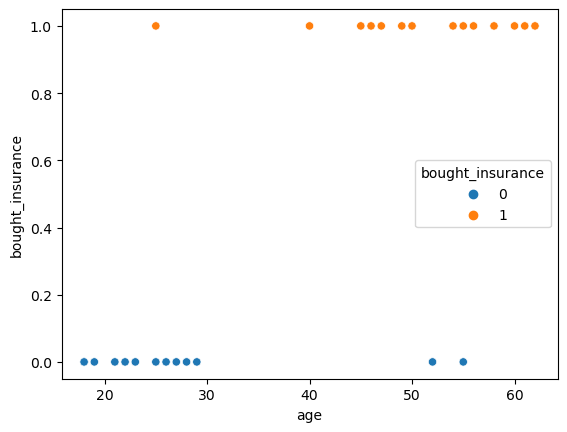

In [12]:
sns.scatterplot(data=data, x = "age", y ="bought_insurance", hue="bought_insurance")

<AxesSubplot:xlabel='bought_insurance', ylabel='count'>

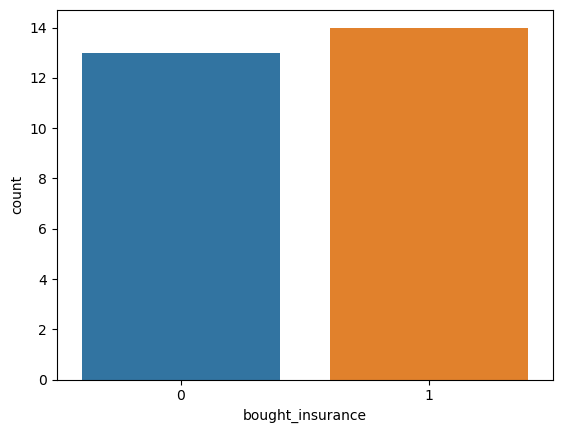

In [13]:
sns.countplot(data= data, x ="bought_insurance")

In [14]:
X1 = data.iloc[:,:-1]
Y1 = data.iloc[:,-1]

In [15]:
#sns.scatterplot(data=data, x = "")

In [16]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X1, Y1, test_size = 0.1, random_state= 42) 

In [17]:
xtrain1.head()

,age
21,26
0,22
11,28
16,25
17,58


In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xtrain1, ytrain1)

LogisticRegression()

In [19]:
ypredicted = lr.predict(xtest1)

In [20]:
ytest1

8     1
13    0
9     1
Name: bought_insurance, dtype: int64

In [21]:
lr.score(xtest1,ytest1)*100

100.0

## Confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest1, ypredicted)

In [23]:
cm

array([[1, 0],
       [0, 2]], dtype=int64)

In [24]:
## positive - postive , negative - positive , negative - positive, negative - negative

In [25]:
lr.score(xtest1, ytest1)

1.0

In [26]:
lr.predict_proba(xtest1)

array([[0.04794221, 0.95205779],
       [0.77002443, 0.22997557],
       [0.0540927 , 0.9459073 ]])

In [27]:
xtest1

,age
8,62
13,29
9,61


#  Project 4 - Customer churn prediction using Logistic regression

In [28]:
data2 = pd.read_csv("Churn_Modelling.csv")

In [29]:
data2.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
data2.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [31]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [32]:
data2.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [33]:
data2 = data2.drop(labels = ["RowNumber","Surname","CustomerId"] , axis=1)

In [34]:
data2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data2["Gender"] = le.fit_transform(data2["Gender"])
data2["Geography"] = le.fit_transform(data2["Geography"])

In [36]:
data2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [37]:
X2 = data.iloc[:,:-1]
Y2 = data.iloc[:,-1]

In [38]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, Y2, test_size = 0.15, random_state= 42 )  ## use startify (can get proper data equal parts)

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xtrain2, ytrain2)

LogisticRegression()

In [40]:
#ypredicted1 = lr.predict(xtest2)

In [41]:
lr.score(xtest2,ytest2)*100

100.0

In [42]:
#ypredicted1

In [43]:
ytest2

8     1
13    0
9     1
21    0
0     0
Name: bought_insurance, dtype: int64

# Project 5 - Analysing Iris dataset

In [44]:
 #ploting a boundary line so that it has maximum distabce between the boundary elements
 #2d - line #3d - plane 

iris = pd.read_csv("iris.csv")

In [45]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
## Descision tree - takes conditions and works on if - else
## KNN - 

In [47]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [48]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [49]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

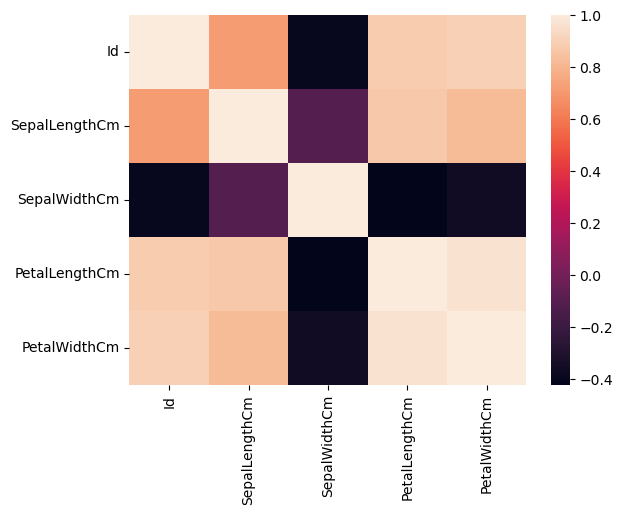

In [50]:
sns.heatmap(iris.corr())

In [51]:
iris = iris.drop(labels=["Id"], axis=1)

In [52]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris["Species"] = le.fit_transform(iris["Species"])

In [54]:
iris["Species"].unique()

array([0, 1, 2])

In [55]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [56]:
X3 = data.iloc[:,:-1]
Y3 = data.iloc[:,-1]

In [57]:
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(X3, Y3, test_size = 0.3, random_state= 42 )  ## use startify (can get proper data equal parts)

In [58]:
xtest3.head()

,age
8,62
13,29
9,61
21,26
0,22


## using descion tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(xtrain3,ytrain3)

DecisionTreeClassifier()

In [60]:
clf.predict(xtest3)

array([1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [61]:
clf.score(xtest3,ytest3)*100

88.88888888888889

## using SVM

In [62]:
from sklearn.svm import SVC

sm = SVC()

sm.fit(xtest3,ytest3)

SVC()

In [63]:
sm.score(xtest3,ytest3)

0.8888888888888888

## using KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(xtest3,ytest3)


KNeighborsClassifier()

In [65]:
knn.score(xtest3,ytest3)

C:\Users\win\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8888888888888888

## Testing with random values

In [66]:
new_data = [6.7, 3.3, 5.7, 2.1]
new_data = np.asarray(new_data).reshape(1,-1)

result = sm.predict(new_data)

C:\Users\win\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but SVC is expecting 1 features as input.

In [ ]:
import pickle as pkl

filepath = "saved_model.sav"

pkl.dump(sm, open(filepath, "bw"))

In [ ]:
import pickle as pkl

load_model = pkl.load(open("saved_model.sav","br"))

In [ ]:
load_model

In [ ]:
#### getting output

import numpy as np

new_data = [6.7, 3.3, 5.7, 2.1]
new_data = np.asarray(new_data).reshape(1,-1)
result = load_model.predict(new_data)


In [ ]:
-